In [39]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [63]:
#fi =  "indata/3pipesL"         #location of .inp file
#fc = "indata/newer3pipesL"     #location of .config file
fii = []
fci = []
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform
V0 =[]
Vf = []
Hbar = []
legs = []
lr = []

In [64]:
Mrs = [0.008]*3
Ds = [1.]*3
jt = [1,3,1,1]
bt = [1,1,1,1]
bv = [0,0,0,0]
r = [0,0,1,1]
h0s = [0,0,0]
q0s = [0,0,0]

T = 35
M = 6200
Mi =50
a = 100
Q00 = 5*np.ones(M+1)
Nl = 6
for i in range(0,Nl):
    from writeit import rewritePipes
    Ns = [100,100,25*(i+1)]
    Ls = [100,100,25*(i+1)]
    fn = "indata/varylength%d"%i
    oldinp = "indata/3pipesL0.inp"
    (fi, fc) = rewritePipes(fn,oldinp, Ns, Ls, Mrs, Ds, jt, bt, bv, r, h0s, q0s, T, M, a)
    fii.append(fi)
    fci.append(fc)

new files are indata/varylength0.inp and indata/varylength0.config
new files are indata/varylength1.inp and indata/varylength1.config
new files are indata/varylength2.inp and indata/varylength2.config
new files are indata/varylength3.inp and indata/varylength3.config
new files are indata/varylength4.inp and indata/varylength4.config
new files are indata/varylength5.inp and indata/varylength5.config


In [65]:
for i in range(0,Nl):
    #fii = fi+"%d.inp"%i
    #fci = fc+"%d.config"%i
    print fci[i]
    n0 = PyNetwork(fii[i], fci[i], mtype)     #a network object
    T = n0.T
    M = n0.M
    print M
    print T
    dt = T/M
    n0.setbVal(0,Q00)
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    #Hmax.append(max([n0.q]))
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))


indata/varylength0.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 25]
indata/varylength1.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 50]
indata/varylength2.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 75]
indata/varylength3.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 100]
indata/varylength4.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 125]
indata/varylength5.config
6200
35.0
T = 35.00 M = 6200 , L = [100, 100, 150]


L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\
\hline\
0.25    & 11.3850    &   44.4531 \\
0.50    & 5.7963    &   49.9365 \\
0.75    & 1.9515    &   9.7390 \\
1.00    & 1.5356    &   7.8363 \\
1.25    & 1.5039    &   7.7444 \\
1.50    & 1.4856    &   7.7196 \\


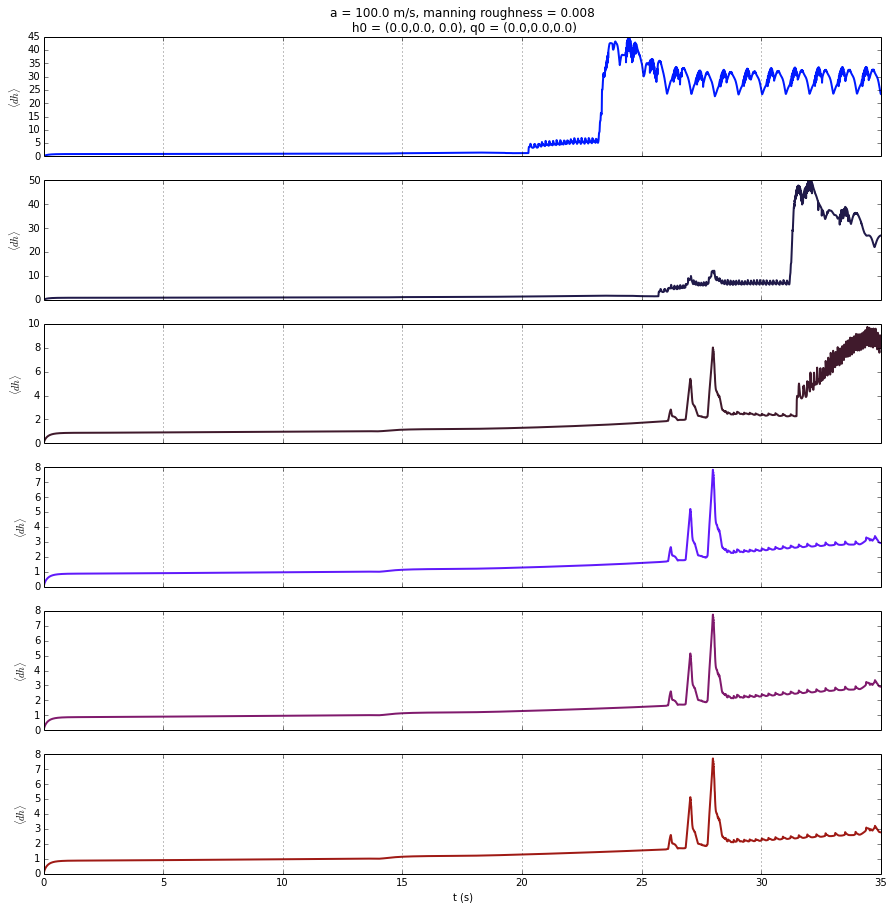

In [70]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\\\n\hline\\"


fig,ax = plt.subplots(nrows = Nh, sharex=True,figsize=(15,15))
mx = max(max(Hbar))
for i in range(len(Hbar)):
    ax[i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    #ax.plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    print "%1.2f    & %.4f    &   %.4f \\\\"%(lr[i], mean(Hbar[i]), max(Hbar[i]))
    #ax[i].text(4,150,r"$L_1/L_2$=%1.2f"%lr[i])
    #ax[i].set_ylim([0,45])
    #ax[i].set_yticks([0,150,300])
    ax[i].set_xlim(0,T)
    ax[i].xaxis.grid(True)
    #ax[i].set_xticklabels([])
    #if i<Nh-1:
    #     ax[i].set_xticklabels([])
    ax[i].set_ylabel(r'$\langle dh \rangle$')
ax[i].set_xlabel('t (s)')
ax[0].set_title("a = %.1f m/s, manning roughness = %.3f\n h0 = (%.1f,%.1f, %.1f), q0 = (%.1f,%.1f,%.1f)"%(n0.a[0], Mrs[0],h0s[0],h0s[1],h0s[2],q0s[0],q0s[1],q0s[2]))
#savefig("../../dhdxresultspretty_6_4_15_newer.eps", format='eps')
plt.show()
#plot(lr, [max(Hbar[i]) for i in range(len(Hbar))],'o')


In [67]:
print len(t)

6201


In [68]:
print len(Hbar[0])

6201


In [69]:
dx = n0.Ls[0]/n0.Ns[0]

In [58]:
dt/dx*n0.cmax[0]

0.075680298698528589

In [59]:
dt/dx*n0.a[0]

0.5714285714285714

In [60]:
n0.M

4200

In [61]:
dt/dx*n0.a[0]

0.5714285714285714

In [62]:

mm = max([mean(Hbar[i]) for i in range(Nh)])

In [ ]:
print mm
print mx

In [14]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\


SyntaxError: unexpected character after line continuation character (<ipython-input-14-de6774cae296>, line 1)

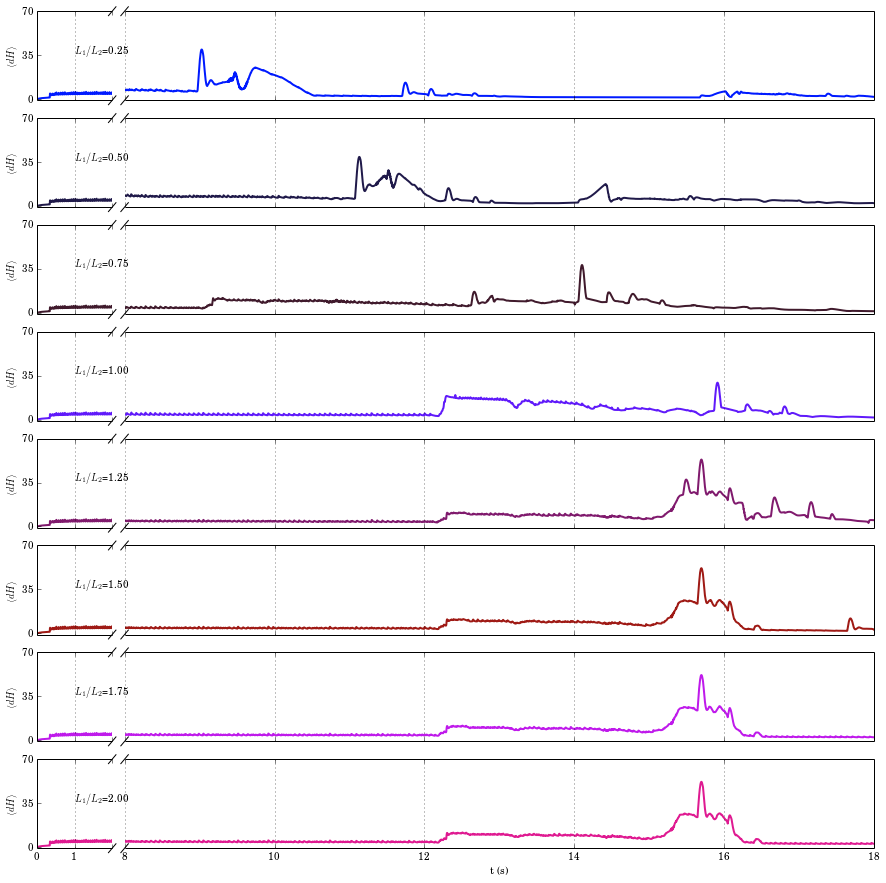

In [42]:
import matplotlib.gridspec as gridspec
rc('text', usetex=True)        #for tex rendering. 
rc('font', family='serif')     #for pretty font 

xlim  = [0., 1.0]
xlab = [0,1]
xlim2 = [8, T]
xlab2 = [8,10,12,14,16,18]
ylim = [-1,70]
yticks = [0,35,70]
xticks = [0,2]
xlimratio = (xlim[1]-xlim[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
xlim2ratio = (xlim2[1]-xlim2[0])/(xlim2[1]-xlim2[0]+xlim[1]-xlim[0])
gs = gridspec.GridSpec(len(Hbar), 2, width_ratios=[xlimratio, xlim2ratio])
fig = plt.figure(figsize=(15,15))
ax = []

for i in range(len(Hbar)):
    ax.append(fig.add_subplot(gs[2*i]))
    ax.append(fig.add_subplot(gs[2*i+1]))
    #erase the bits of bounding box you don't want
    ax[2*i].spines['right'].set_visible(False)
    ax[2*i+1].spines['left'].set_visible(False)

    ax[2*i].yaxis.tick_left()
    ax[2*i+1].set_yticks([])
    ax[2*i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    ax[2*i+1].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)

    ax[2*i+1].set_xlim(xlim2)
    ax[2*i].set_xlim(xlim)
    ax[2*i].set_ylabel(r'$\langle dH\rangle$')  
    ax[2*i].set_xticklabels([])
    ax[2*i+1].set_xticklabels([])
    
    ax[2*i].set_ylim(ylim)
    ax[2*i+1].set_ylim(ylim)

    ax[2*i].set_yticks(yticks)
    ax[2*i].set_yticklabels(yticks)
    ax[2*i].set_xticks(xticks)

    ax[2*i].set_xticks([0,1,2])
   
    ax[2*i].text(1,ylim[1]/2,r"$L_1/L_2$=%1.2f"%lr[i])  #label the subplots
    
    #diagonal lines for split axes
    d = .05 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax[2*i].transAxes, color='k', clip_on=False)
    dx = d/(xlim[1]-xlim[0])
    dy = d
    ax[2*i].plot((1-dx,1+dx),(-dy,+dy), **kwargs)    # top-right diagonal
    ax[2*i].plot((1-dx,1+dx),(1-dy,1+dy), **kwargs) # bottom-right diagonal
    dx = d/(xlim2[1]-xlim2[0])
    kwargs.update(transform=ax[2*i+1].transAxes)  # switch to the bottom axes
    ax[2*i+1].plot((-dx,+dx),(-dy,+dy), **kwargs)      # top-left diagonal
    ax[2*i+1].plot((-dx,+dx),(1-dy,1+dy), **kwargs)    # bottom-left diagonal
    plt.subplots_adjust(wspace=0.03)
    #make vertical gridlines
    ax[2*i+1].xaxis.grid(True)
    ax[2*i].xaxis.grid(True)
ax[2*i].set_xticklabels(xlab)
ax[2*i+1].set_xticklabels(xlab2)
ax[2*i+1].set_xlabel('t (s)')
savefig("../../dhdxresultsprettynewer_6_4_2015.eps", format='eps')

In [ ]:
0.25    & 9.5491e-04    &   1.4849e-02 &  0.0016\\
0.50    & 2.8327e-04    &   6.6836e-03 &  0.0014\\
0.75    & 1.2744e-04    &   6.8720e-03 &  0.0013\\
1.00    & 9.7234e-05    &   1.8817e-03 &  0.0012\\
1.25    & 1.0306e-04    &   5.7161e-03 &  0.0011\\
1.50    & 1.3225e-04    &   7.2537e-03 &  0.0010\\
1.75    & 1.2816e-04    &   7.2534e-03 &  0.0009\\
2.00    & 1.2602e-04    &   7.2522e-03 &  0.0009\\


In [ ]:
import pickle
pickle.dump(Hbar, open( "../../example.p", "wb" ) )

In [30]:
y = pickle.load(open("../../example.p"))

[0.0,
 0.03660457307790188,
 0.0744613579539738,
 0.11018305010817553,
 0.14445217228673513,
 0.17836656034953768,
 0.2101416890097323,
 0.24098615582209504,
 0.271229866438073,
 0.2999569674171847,
 0.32853539308562807,
 0.35602121067702197,
 0.382403381879186,
 0.40843917505539573,
 0.4345951749899605,
 0.4599168590821032,
 0.4843551095004094,
 0.5088798581599341,
 0.5325953606303365,
 0.5563676181425243,
 0.5793340275526746,
 0.6016606074124643,
 0.6226804878530647,
 0.6421851617316736,
 0.6554195505927637,
 0.6737983830785977,
 0.6869761809717595,
 0.7042458756154433,
 0.7163769796816739,
 0.7329877610113393,
 0.7449846180763778,
 0.7616889387562689,
 0.7731291950247239,
 0.7891146275182053,
 0.8001347314354705,
 0.8155120497253328,
 0.8261641767714626,
 0.8410421603268524,
 0.8514039165944683,
 0.8649084210503891,
 0.8758187579046057,
 0.8882891563599069,
 0.8996879861698652,
 0.9114088822607582,
 0.9228488291253101,
 0.9338107491123366,
 0.945146347845794,
 0.9546182933119728,
 0